In [15]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.decomposition import RandomizedPCA

In [2]:
digits=datasets.load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'DESCR', 'target_names', 'images', 'target'])

In [4]:
# Isolate the `digits` data
digits_data = digits.data

In [5]:
# Inspect the shape
print(digits_data.shape)

(1797, 64)


In [6]:
# Isolate the target values with `target`
digits_target = digits.target

In [7]:
# Inspect the shape
print(digits_target.shape)

(1797,)


In [8]:
# Print the number of unique labels
number_digits = len(np.unique(digits.target))
number_digits

10

In [9]:
# Isolate the `images`
digits_images = digits.images

# Inspect the shape
print(digits_images.shape)

(1797, 8, 8)


#### To recap: by inspecting digits.data, you see that there are 1797 samples and that there are 64 features. Because you have 1797 samples, you also have 1797 target values.

In [10]:
print(np.all(digits.images.reshape((1797,64)) == digits.data))

True


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

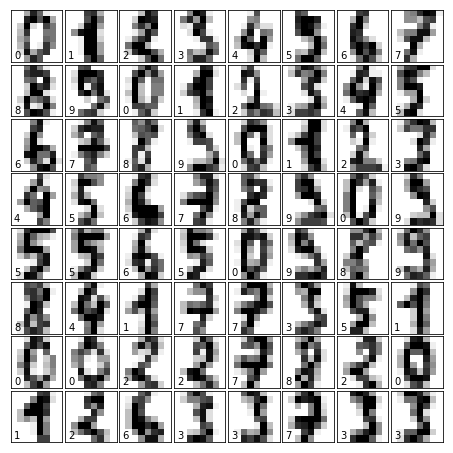

In [12]:
# Figure size (width, height) in inches
fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images
for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

# Show the plot
plt.show()

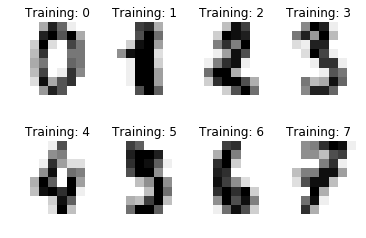

In [13]:
# Join the images and target labels in a list
images_and_labels = list(zip(digits.images, digits.target))

# for every element in the list
for index, (image, label) in enumerate(images_and_labels[:8]):
    # initialize a subplot of 2X4 at the i+1-th position
    plt.subplot(2, 4, index + 1)
    # Don't plot any axes
    plt.axis('off')
    # Display images in all subplots 
    plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
    # Add a title to each subplot
    plt.title('Training: ' + str(label))

# Show the plot
plt.show()

In [18]:
from sklearn.decomposition import PCA


# Create a Randomized PCA model that takes two components
randomized_pca = RandomizedPCA(n_components=2)

# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(digits.data)

# Create a regular PCA model 
pca = PCA(n_components=2)

# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(digits.data)

# Inspect the shape
reduced_data_pca.shape

# Print out the data
print(reduced_data_rpca)
print(reduced_data_pca)

[[ -1.2261041   21.26756   ]
 [  7.93906856 -20.79405657]
 [  6.99844467 -10.01398654]
 ..., 
 [ 10.79608582  -7.00325236]
 [ -4.81725477  12.36855784]
 [ -0.34223886   6.35700078]]
[[ -1.25946608  21.27488323]
 [  7.95761436 -20.7686814 ]
 [  6.99192062  -9.95599855]
 ..., 
 [ 10.80128355  -6.96025426]
 [ -4.8720991   12.42395842]
 [ -0.34439208   6.36553557]]


/Users/tmartin/venv/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
